In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/mySem6/Computer Vision/CV Final project

/content/drive/My Drive/mySem6/Computer Vision/CV Final project


In [0]:
! sudo apt-get install libzbar0
! pip install pyzbar
! pip install xmltodict

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (307 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readl

In [0]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [87.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:12 https://developer.download.nvidia.com/compute/machine-learn

In [0]:
!pip install tesseract
!pip install tesseract-ocr
!pip install pytesseract

     |████████████████████████████████| 45.6MB 88kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=c39a68b5aba594cdc743981eef097b347694e86abb2e0f178eadb780773f4566
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp36-cp36m-linux_x86_64.whl size=115382 sha256=3bc0f06fc33719a72ef30faaf8b68ffff9ca1a449a37d2a5026a42637aea3119
  Stored in directory: /root/.cache/pip/wheels/7d/32/ba/e0852fe25fb388c8108871713a344ec638e231d27f53b742db
Successfully built tesseract-ocr
  Created wheel for pytesseract: filename=pytesseract-0.3.3-py2.py3-none-any.whl size=13396 sha256=3841a2ab7ab95277519d799324d71db3445c8a7b25e487d94a333d61e88e8158
  Stored in directory: /root/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241
Successfully built pytesseract


In [0]:
import numpy as np
import cv2
from pyzbar import pyzbar
import pytesseract
import xmltodict
import re
from google.colab.patches import cv2_imshow

In [0]:
def scanqr(image,im):
    """returns dictionary containing name and dob"""
    barcodes = pyzbar.decode(image)
    if len(barcodes) != 1 : 
        scanqr(im,im) # default list returned detected more than 1 barcodes or no barcodes
        return {}
    barcode = barcodes[0]
    qrdata_xml = barcode.data.decode("utf-8")
    qrdata_dict = xmltodict.parse(qrdata_xml)
    output = {}
    output['Name'] = str(qrdata_dict['PrintLetterBarcodeData']['@name'])
    output['Date of Birth'] = str(qrdata_dict['PrintLetterBarcodeData']['@dob'])
    return output

In [0]:
def order_points(pts):
  # initialzie a list of coordinates that will be ordered
  # such that the first entry in the list is the top-left,
  # the second entry is the top-right, the third is the
  # bottom-right, and the fourth is the bottom-left
  rect = np.zeros((4, 2), dtype = "float32")
  s = pts.sum(axis = 1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]
  diff = np.diff(pts, axis = 1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]
  return rect

In [0]:
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) * (br[0] - bl[0])) + ((br[1] - bl[1]) * (br[1] - bl[1])))
    widthB = np.sqrt(((tr[0] - tl[0]) * (tr[0] - tl[0])) + ((tr[1] - tl[1]) * (tr[1] - tl[1])))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) * (tr[0] - br[0])) + ((tr[1] - br[1]) * (tr[1] - br[1])))
    heightB = np.sqrt(((tl[0] - bl[0]) * (tl[0] - bl[0])) + ((tl[1] - bl[1]) * (tl[1] - bl[1])))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

In [0]:
def get_qr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradX = cv2.Sobel(gray, ddepth = cv2.cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
    gradY = cv2.Sobel(gray, ddepth = cv2.cv2.CV_32F, dx = 0, dy = 1, ksize = 3)
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    blurred = cv2.blur(gradient, (4, 4))
    (_, thresh) = cv2.threshold(blurred, 150, 250, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 15))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    closed = cv2.erode(closed, None, iterations = 13)
    closed = cv2.dilate(closed, None, iterations = 16)
    (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.cv2.boxPoints(rect))
    # draw a bounding box arounded the detected barcode and display the
    # image
    a = cv2.drawContours(image, [box], -1, (0, 255, 0), 1)
    finimg = four_point_transform(image, box)
    qr = finimg[2:(finimg.shape[0]-2), 2:(finimg.shape[1]-2)]
    return(qr)

In [0]:
def get_aadhar_details(image):
    details = image[int(0.2*image.shape[0]):(image.shape[0]-int(0.4*image.shape[0])), int(0.15*image.shape[1]):(image.shape[1]-int(0.27*image.shape[1]))]
    cv2_imshow(details)
    custom_config = r'-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz --psm 6'
    junk=pytesseract.image_to_string(details, config=custom_config)
    details_li = junk.split('\n')
    while '' in details_li:
        details_li.remove('')
    if ' ' in details_li:
        details_li.remove(' ')
    for i in range(len(details_li)):
        if 'DOB' in details_li[i]:
            ind = i
    dob = details_li[ind].split('DOB :')[1]
    dob = dob.strip('.')
    dob = dob.strip(',')
    dob = dob.strip('|')
    dob = dob.strip()
    output = {}
    output['Date of Birth'] = dob
    output['Name'] = details_li[ind-1]
    return output


In [0]:
def verification(ad,qd):
    flag = 0
    print("dob extracted from qr : " + str(qd["Date of Birth"]))
    print("dob extracted using ocr : " + str(ad["Date of Birth"]))     
    if ad["Date of Birth"] != qd["Date of Birth"]:
        print("dob not matching")    
        flag +=1  
    if qd["Name"] not in ad["Name"]:
        print("Names not matched")
        flag +=1
    else:
        print("Names matched")

    if flag == 0:
      print("Aadhar Verified.")
    else:
      print("Fake Aadhar.")

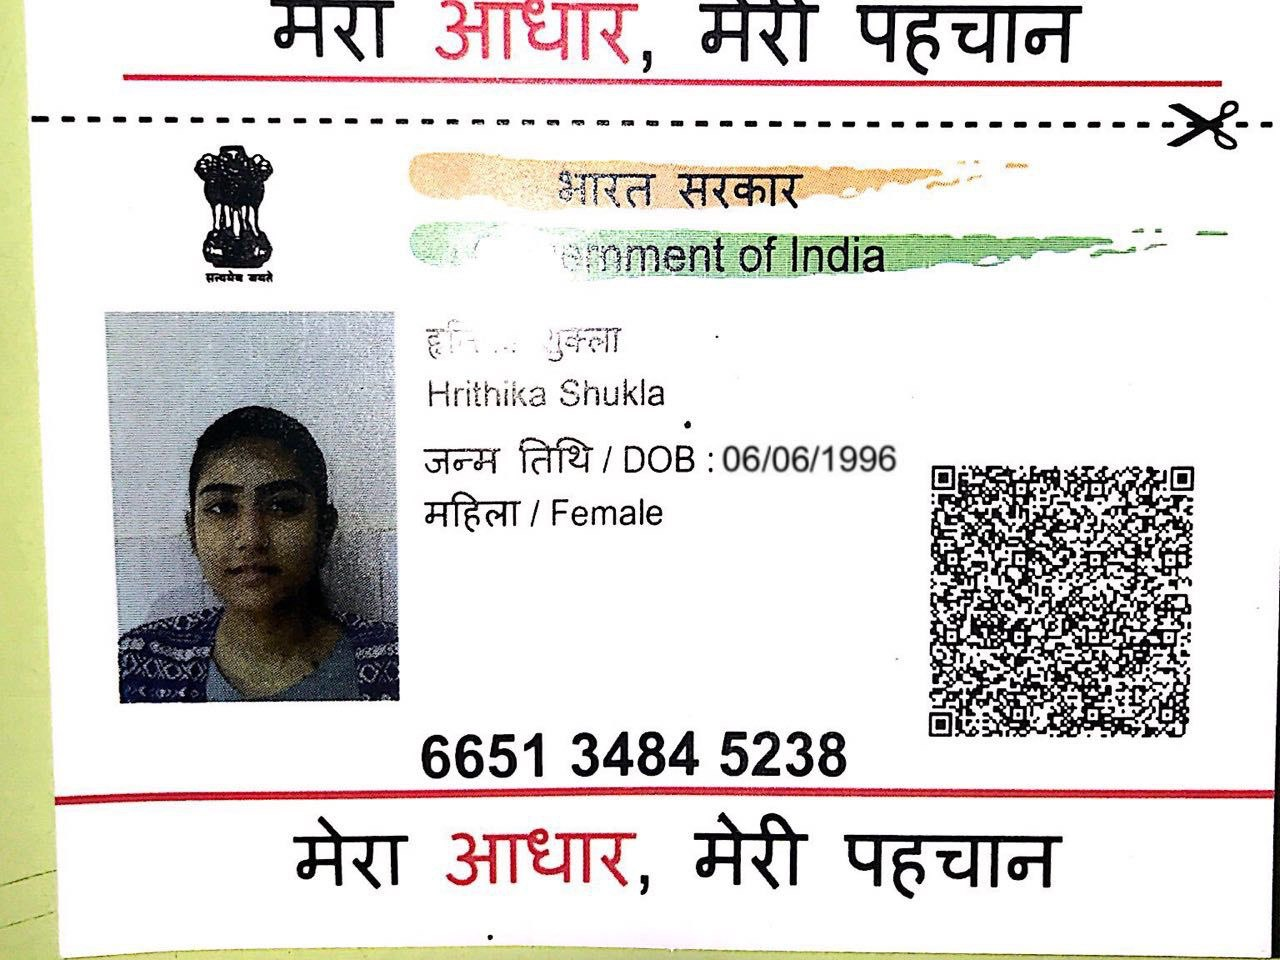

In [0]:
im = cv2.imread("testqr4.jpeg")
cv2_imshow(im)

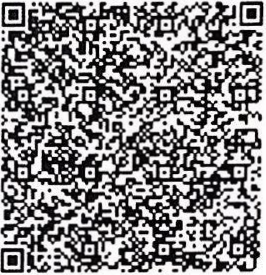

In [0]:
qr = get_qr(im)
cv2_imshow(qr)

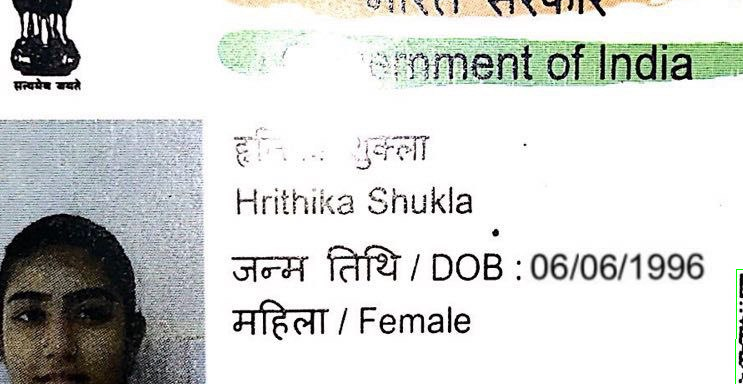

In [0]:
aadhar_details = get_aadhar_details(im)

In [0]:
qr_details = scanqr(qr,im)

In [0]:
verification(aadhar_details,qr_details)

dob extracted from qr : 18/02/2000
dob extracted using ocr : 06/06/1996
dob not matching
Names matched
Fake Aadhar.
